In [325]:
# common imports

import matplotlib.pyplot as plt

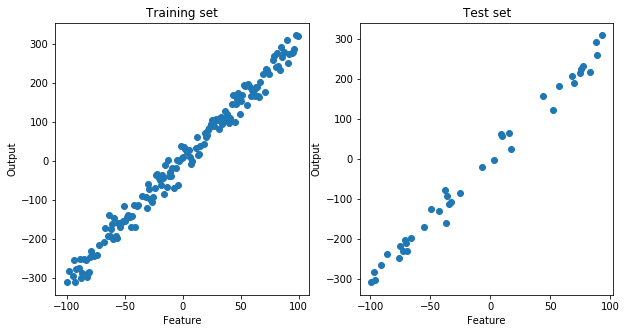

In [333]:
# generate a random dataset

import random

def f(x):
    slope = 3
    yIntercept = 4
    errorTerm = random.normalvariate(0, 21)
    
    return (slope * x) + yIntercept + errorTerm


features = range(-100, 100)
outputs = list(map(f, features))

# <-- split the data into training/test sets -->
allDataSet = list(zip(features, outputs))
random.shuffle(allDataSet)
trainingSet = allDataSet[:160]
testSet = allDataSet[161:]
# </- split the data into training/test sets -->

# <-- plot data sets -->
fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

pltLeft.title.set_text('Training set')
pltLeft.set_xlabel('Feature')
pltLeft.set_ylabel('Output')
pltLeft.scatter(*zip(*trainingSet))

pltRight.title.set_text('Test set')
pltRight.set_xlabel('Feature')
pltRight.set_ylabel('Output')
pltRight.scatter(*zip(*testSet))
# <.- plot data sets -->

In [339]:
# introduce a cost function

def predict(feature, parameters):
    # TODO: vectorize in more complex case
    return parameters[0] + (parameters[1] * feature)

def meanSquaredError(observed, predicted):
    rss = sum(map(
        lambda i: (i[0] - i[1]) ** 2,
        zip(observed, predicted)
    ))
    return rss / len(predicted)

def cost(dataSet, parameters):
    inputs, outputs = zip(*dataSet)
    predicted = map(lambda i: predict(i, parameters), inputs)
    
    return meanSquaredError(predicted, outputs)


# unit tests
print(f'predict = {predict(3, [1, 2]) == 7}')
print(f'meanSquaredError = {meanSquaredError([2, 2], [3, 1]) == 1}')
print(f'cost = {cost([(1, 2), (2, 5)], [1, 2]) == .5}')

predict = True
meanSquaredError = True
cost = True


Text(0,0.5,'parameter 1')

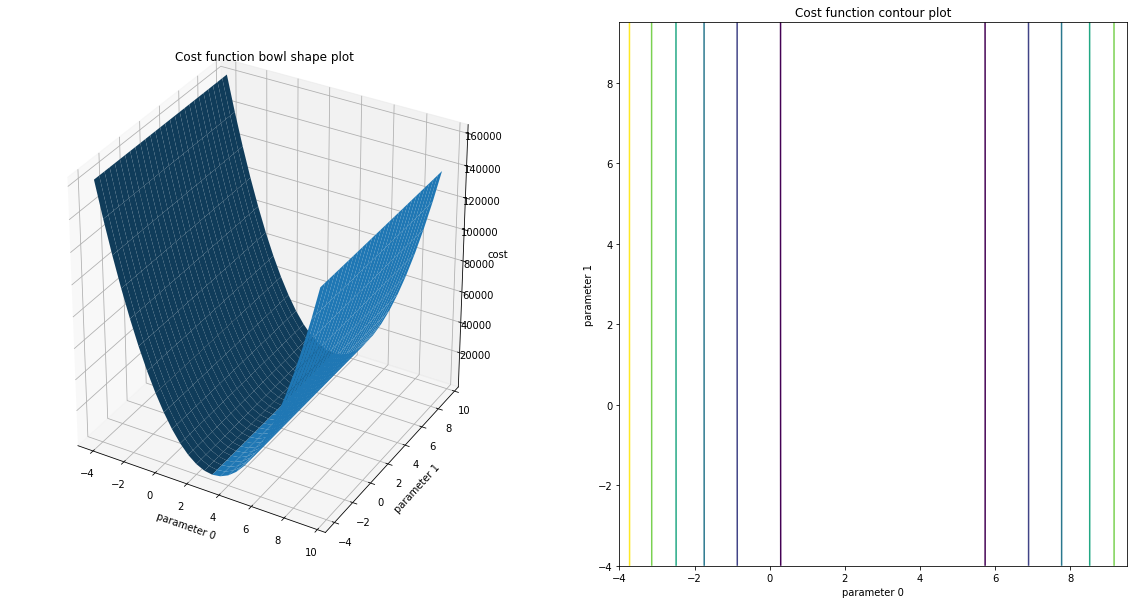

In [328]:
# bowl shape and contour plots
# TODO: why isn't the bowl shape plot really bowl shaped

import numpy as np
from mpl_toolkits import mplot3d


# <-- prepare cost function data for plotting -->
bowlShape_cost = []
bowlShape_parameters = np.arange(-4, 10, 0.5)
bowlShape_parameters0, bowlShape_parameters1 = np.meshgrid(bowlShape_parameters, bowlShape_parameters)

for parameter0 in bowlShape_parameters:
    bowlShape_cost_vector = []    
    for parameter1 in bowlShape_parameters:
        bowlShape_cost_vector.append(cost(trainingSet, [parameter0, parameter1]))
    bowlShape_cost.append(bowlShape_cost_vector)

bowlShape_cost = np.matrix(bowlShape_cost)
# </- prepare cost function data for plotting -->


# <-- plot the cost function -->
fig = plt.figure(figsize=(20, 10))

pltLeft = fig.add_subplot(1, 2, 1, projection='3d')
pltLeft.plot_surface(bowlShape_parameters0, bowlShape_parameters1, bowlShape_cost)
pltLeft.set_title('Cost function bowl shape plot')
pltLeft.set_xlabel('parameter 0')
pltLeft.set_ylabel('parameter 1')
pltLeft.set_zlabel('cost')

pltRight = fig.add_subplot(1, 2, 2)
pltRight.contour(bowlShape_parameters0, bowlShape_parameters1, bowlShape_cost)
pltRight.set_title('Cost function contour plot')
pltRight.set_xlabel('parameter 0')
pltRight.set_ylabel('parameter 1')
# </- plot the cost function -->

In [344]:
# cost function minimization (gradient descent)

# <-- cost function derivatives -->
def costPrime(example, parameters):
    return (predict(example[0], parameters) - example[1]) * example[0]
def costPrimeBias(example, parameters):
    return (predict(example[0], parameters) - example[1])
# </- cost function derivatives -->

def loss(dataSet, parameters, costPrimeFunc):
    errors = map(lambda example: costPrimeFunc(example, parameters), dataSet)
    return sum(errors) / len(dataSet)

def minimize(dataSet, parameters, learningRate):
    return [
        parameters[0] - learningRate * loss(dataSet, parameters, costPrimeBias),
        parameters[1] - learningRate * loss(dataSet, parameters, costPrime)
    ]


# unit tests
print(f'costPrime = {costPrime([3, 2], [1, 2]) == 15}')
print(f'costPrimeBias = {costPrimeBias([3, 2], [1, 2]) == 5}')
print(f'loss = {loss([(3, 2), (5, 1)], [1, 2], costPrime) == 32.5}')
print(f'loss = {loss([(3, 2), (5, 1)], [1, 2], costPrimeBias) == 7.5}')
print(f'minimize = {minimize([(3, 2), (5, 1)], (1, 2), 0.001) == [0.9925, 1.9675]}')

costPrime = True
costPrimeBias = True
loss = True
loss = True
minimize = True


Error: (34, 'Result too large') with learning rate = 0.01
Error: (34, 'Result too large') with learning rate = 0.03
Error: (34, 'Result too large') with learning rate = 0.001
Error: (34, 'Result too large') with learning rate = 0.003

Best learning rate = 0.0003


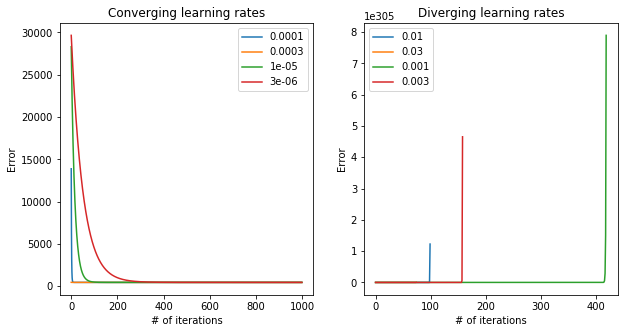

In [330]:
# try different learning rates

def tryLearningRate(dataSet, learningRate):
    parameters = [0, 0]
    errorOverIterations = []
    for iterationNumber in range(1000):
        parameters = minimize(dataSet, parameters, learningRate)
        try:
            error = cost(trainingSet, parameters)
        except BaseException as e:
            print(f'Error: {e} with learning rate = {learningRate}')
            break

        errorOverIterations.append((iterationNumber, error))
    
    return errorOverIterations

def tryLearningRates(learningRates, plot):
    for learningRate in learningRates:
        errorOverIterations = tryLearningRate(trainingSet, learningRate)
        plot.plot(*zip(*errorOverIterations), label=learningRate)



fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

# <-- converging learning rates -->
tryLearningRates([0.0001, 0.0003, 0.00001, 0.000003], pltLeft)
pltLeft.title.set_text('Converging learning rates')
pltLeft.set_xlabel('# of iterations')
pltLeft.set_ylabel('Error')
pltLeft.legend()
# </- converging learning rates -->

# <-- diverging learning rates -->
tryLearningRates([0.01, 0.03, 0.001, 0.003], pltRight)
pltRight.title.set_text('Diverging learning rates')
pltRight.set_xlabel('# of iterations')
pltRight.set_ylabel('Error')
pltRight.legend()
# </- diverging learning rates -->

learningRate = 0.0003
print(f'\nBest learning rate = {learningRate}')

improvement = 9.998742598327226e-07 in 14023 iterations

Training results:
Learned parameters = [2.6981496365406845, 3.07467951091245]
MSE = 396.62582522565253
R^2 score = 0.9892655982946583

Training results (sci-kit):
Learned parameters = [0.         3.07466289]
MSE = 396.7590481090074
R^2 score = 0.9892619927101116


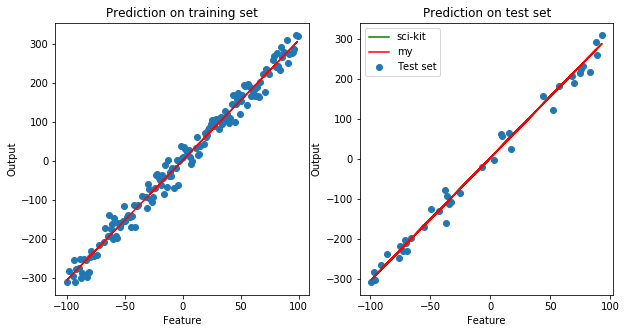

In [398]:
# learn the parameters

from sklearn.metrics import mean_squared_error, r2_score

def learn(dataSet, learningRate):
    parameters = [0, 0]
    jOverIterations = []
    error = cost(trainingSet, parameters)
    prevError = 0
    improvement = None
    numberOfIterationsPassed = 0
    while True:
        numberOfIterationsPassed += 1
        prevError = error
        parameters = minimize(dataSet, parameters, learningRate)
        error = cost(trainingSet, parameters)
        improvement = prevError - error
        if improvement <= 0.000001:
            break
    
    print(f'improvement = {improvement} in {numberOfIterationsPassed} iterations')
    return parameters

parameters = learn(trainingSet, 0.0003)


# <-- Run some metrics -->
X_train, y_train = zip(*trainingSet)
X_test, y_test = zip(*testSet)

print('\nTraining results:')
print(f'Learned parameters = {parameters}')
print(f'MSE = {mean_squared_error(y_test, testOutputs)}')
print(f'R^2 score = {r2_score(y_test, testOutputs)}')

#     <-- Run sci-kit -->
from sklearn import linear_model
import numpy as np

X_train_sk = np.ones((len(X_train), 2))
X_train_sk[:,1] = np.array(X_train)

X_test_sk = np.ones((len(X_test), 2))
X_test_sk[:,1] = np.array(X_test)

skLinearRegression = linear_model.LinearRegression()
skLinearRegression.fit(X_train_sk, y_train)
y_pred_sk = skLinearRegression.predict(X_test_sk)
print('\nTraining results (sci-kit):')
print(f'Learned parameters = {skLinearRegression.coef_}')
print(f'MSE = {mean_squared_error(y_test, y_pred_sk)}')
print(f'R^2 score = {r2_score(y_test, y_pred_sk)}')
#     </- Run sci-kit -->

# </- Run some metrics -->


# plot predictions
def makePrediction(features):
    return list(map(lambda example: predict(example, parameters), features))

fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

# <-- plot prediction on training set ->
pltLeft.title.set_text('Prediction on training set')
pltLeft.set_xlabel('Feature')
pltLeft.set_ylabel('Output')
pltLeft.scatter(*zip(*trainingSet))

trainingFeatures = list(zip(*trainingSet))[0]
trainingOutputs = makePrediction(trainingFeatures)
pltLeft.plot(trainingFeatures, trainingOutputs, 'r')
# </- plot prediction on training set ->

# <-- plot prediction on test set ->
pltRight.title.set_text('Prediction on test set')
pltRight.set_xlabel('Feature')
pltRight.set_ylabel('Output')
pltRight.scatter(*zip(*testSet), label='Test set')

testFeatures = list(zip(*testSet))[0]
testOutputs = makePrediction(testFeatures)
pltRight.plot(testFeatures, y_pred_sk, 'g', label='sci-kit')
pltRight.plot(testFeatures, testOutputs, 'r', label='my')
pltRight.legend()
# </- plot prediction on test set ->

Test set size = 39

Training set size = 1
improvement = -19.906643750879766 in 4 iterations
Training set error = 8.334730953098157 Test set error = 465.8288754355929

Training set size = 11
improvement = 6.617378289774933e-07 in 15891 iterations
Training set error = 219.04949923209134 Test set error = 399.8452477521608

Training set size = 21
improvement = -0.00031929469560054713 in 24 iterations
Training set error = 242.9340993475376 Test set error = 387.4389544426299

Training set size = 31
improvement = 6.634607530031644e-07 in 13878 iterations
Training set error = 236.43211699494933 Test set error = 403.39645550827646

Training set size = 41
improvement = -1.8724399524217006e-06 in 39 iterations
Training set error = 276.8850444454275 Test set error = 405.5433522763419

Training set size = 51
improvement = 9.999842518482183e-07 in 85304 iterations
Training set error = 254.79452371939325 Test set error = 389.93099624252017

Training set size = 61
improvement = 9.99964356651617e-07 in

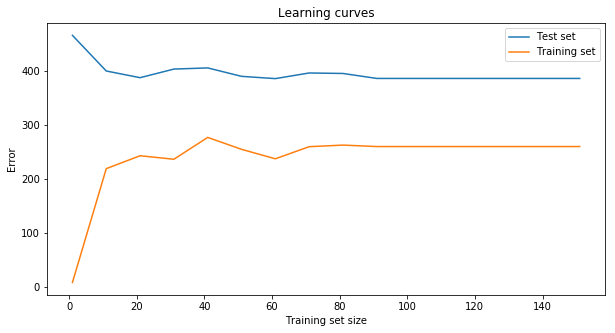

In [334]:
# plot the learning curves

print(f'Test set size = {len(testSet)}\n')
    
testSetLearningCurve = []
trainingSetLearningCurve = []
for trainingSetSize in range(1, len(trainingSet), 10):
    print(f'Training set size = {trainingSetSize}')
    learningCurveDataSet = dataSet[:trainingSetSize]
    parameters = learn(learningCurveDataSet, 0.0003)
    
    testSetError = cost(testSet, parameters)
    testSetLearningCurve.append((trainingSetSize, testSetError))
    
    trainingSetError = cost(learningCurveDataSet, parameters)
    trainingSetLearningCurve.append((trainingSetSize, trainingSetError))
    print(f'Training set error = {trainingSetError} Test set error = {testSetError}')
    print()


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(*zip(*testSetLearningCurve), label='Test set')
ax.plot(*zip(*trainingSetLearningCurve), label='Training set')

ax.title.set_text('Learning curves')
ax.set_xlabel('Training set size')
ax.set_ylabel('Error')
ax.legend()

# TODO: k-fold validation

In [395]:
import numpy as np

a = np.ones((3, 2))
b = np.random.rand(1, 3)
print(b)
a[:,1] = b
print(a)

[[0.59026049 0.05258522 0.97899992]]
[[1.         0.59026049]
 [1.         0.05258522]
 [1.         0.97899992]]
